In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('tips')

### Imprimir datos vacios
print(df.isnull().sum())

### Imprimir valores duplicados
print("valores duplicados",df.duplicated().sum())
# Seleccionar filas duplicadas
filas_duplicadas = df[df.duplicated()]

# Mostrar las filas duplicadas
print(filas_duplicadas)
df

### No se encuentran datos nulos pero sin embargo el dataset tiene 2 filas duplicados

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
valores duplicados 1
     total_bill  tip     sex smoker   day   time  size
202        13.0  2.0  Female    Yes  Thur  Lunch     2


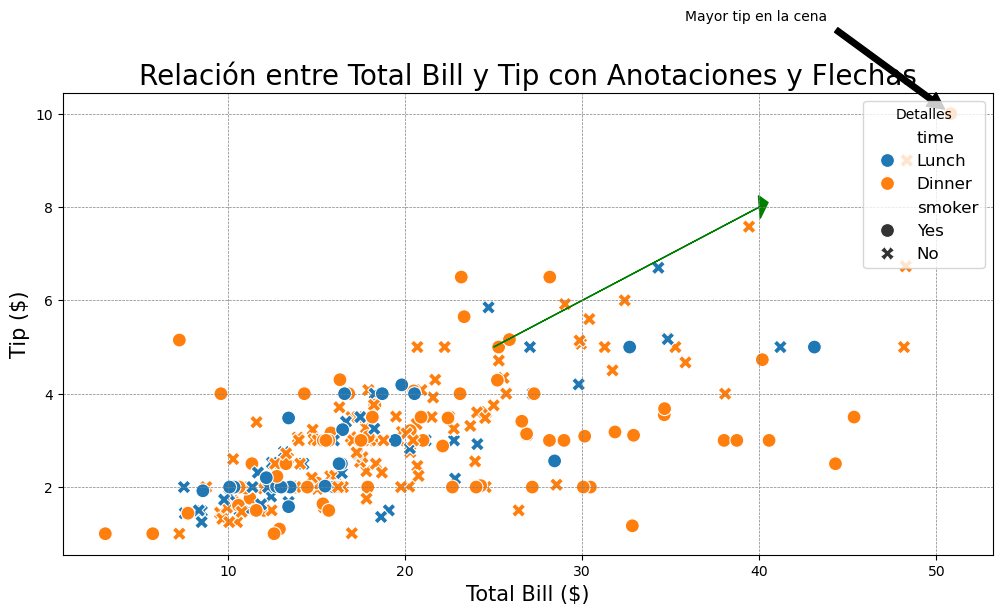

In [20]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de dispersión con cuadrícula, leyenda, anotaciones y flechas
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', style='smoker', s=100, ax=ax)
ax.set_title('Relación entre Total Bill y Tip con Anotaciones y Flechas', fontsize=20)
ax.set_xlabel('Total Bill ($)', fontsize=15)
ax.set_ylabel('Tip ($)', fontsize=15)
ax.legend(loc='upper right', fontsize='large', shadow=False, title='Detalles')

# Añadir cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Añadir anotación
# Encontramos el punto con la mayor propina durante la cena para anotarlo
max_tip = df[df['time'] == 'Dinner']['tip'].max()
max_tip_row = df[(df['time'] == 'Dinner') & (df['tip'] == max_tip)]
total_bill_max_tip = max_tip_row['total_bill'].values[0]
tip_max_tip = max_tip_row['tip'].values[0]

ax.annotate('Mayor tip en la cena', xy=(total_bill_max_tip, tip_max_tip), xytext=(total_bill_max_tip - 15, tip_max_tip + 2),
            arrowprops=dict(facecolor='black', shrink=0.05))

# Añadir flecha
# Dibujar una flecha desde una posición específica hacia otra
ax.arrow(25,5,15,3, head_width=0.5, head_length=0.5, fc='green', ec='green')

# Mostrar el gráfico
plt.show()

##### Se puede observar que existen una tendencia para arriba de que a mayor monto total hay mayor numero de tips. tambien se pueden observar que en las cenas las propinas y las cuentas son mas altas que en el almuerzo. Para el caso de los fumadores y no fumadores no existe una tendencia visible. 

##### La anotacion "mayor tip de la cena" apunta a un punto especifico en el que se representa una de las propinas mas altas. La flecha verde resalta una relacion positiva entre el total de la cuenta y los tips 